In [1]:
import pandas as pd
import numpy as np

In [2]:
# load dataset
df=pd.read_csv('Bank Customer Churn Prediction.csv')

# PREPROCESSING

In [3]:
# customer id is unique for every person so this not useful in our analysis
df.drop('customer_id',axis=1,inplace=True)

In [4]:
df.head()

,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [5]:
#split our dataframe into x-feature variable and y-target variable.
X=df.drop('churn',axis=1) # Features (all columns except 'churn')
Y=df['churn'] # Target variable ('churn' column)

In [6]:
X.head() # preview of feature varibale

,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [7]:
Y.head() # preview of target varibale

0    1
1    0
2    1
3    0
4    0
Name: churn, dtype: int64

In [8]:
# find list of numerical feature and categorical feature

# List numerical features
num_columns = X.select_dtypes(include='number').columns.tolist()
print('num_columns :',num_columns)

# List categorical features
cat_columns = X.select_dtypes(include='object').columns.tolist()
print('cat_columns',cat_columns)


num_columns : ['credit_score', 'age', 'tenure', 'balance', 'products_number', 'credit_card', 'active_member', 'estimated_salary']
cat_columns ['country', 'gender']


In [9]:
from sklearn.model_selection import train_test_split
random_state=10

# Split X and y into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, Y,
                                                    test_size=0.3,
                                                    random_state=random_state,
                                                    stratify=df.churn)


In [10]:
# Print number of observations in X_train, X_test, y_train, and y_test
print('X_train:', len(X_train))
print('X_test:', len(X_test))
print('y_train:', len(y_train))
print('y_test:', len(y_test))



X_train: 7000
X_test: 3000
y_train: 7000
y_test: 3000


In [11]:
# for numerical fetures
num_features = [] 

for i in num_columns:
    location = X.columns.get_loc(i) # this give loaction/index of the current column
    num_features.append(location)
print(num_features)


# for categorical features
cat_features = []

for i in cat_columns:
    location = X.columns.get_loc(i)
    cat_features.append(location)
print(cat_features)



[0, 3, 4, 5, 6, 7, 8, 9]
[1, 2]


In [12]:

from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer, make_column_transformer

# Need to be numeric not string to specify columns name 
preprocess = make_column_transformer(
    (MinMaxScaler(), [0,3,4,5,6,7,8,9]),
    (OneHotEncoder(sparse=False), [1,2])
)
preprocess

ColumnTransformer(transformers=[('minmaxscaler', MinMaxScaler(),
                                 [0, 3, 4, 5, 6, 7, 8, 9]),
                                ('onehotencoder', OneHotEncoder(sparse=False),
                                 [1, 2])])

In [13]:
# importing models
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.ensemble import GradientBoostingClassifier
# Function for creating model pipelines - 
from sklearn.pipeline import make_pipeline
#foe evaluation of model --Classification metrics
from sklearn.metrics import confusion_matrix,f1_score,precision_score,recall_score,accuracy_score

# FOR LOGISTIC REGRESSION MODEl..

In [14]:
# Import classifier
from sklearn.linear_model import LogisticRegression 

# Define model with pipeline
Logistic_model = make_pipeline(preprocess,LogisticRegression(random_state=random_state))

Logistic_model

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('minmaxscaler',
                                                  MinMaxScaler(),
                                                  [0, 3, 4, 5, 6, 7, 8, 9]),
                                                 ('onehotencoder',
                                                  OneHotEncoder(sparse=False),
                                                  [1, 2])])),
                ('logisticregression', LogisticRegression(random_state=10))])

In [15]:
from sklearn.model_selection import GridSearchCV  # used for hyperparameter tunning

In [17]:
lr_param_grid = {
    'logisticregression__C' : [0.01, 0.05, 0.1, 0.5, 1, 5],
    'logisticregression__solver' : ['liblinear', 'newton-cg', 'lbfgs', 'sag', 'saga']
}

lr_grid = GridSearchCV(Logistic_model, lr_param_grid, verbose=3, cv= 5, scoring='accuracy')

In [18]:
# Fit the GridSearchCV object to the training data
lr_grid.fit(X_train, y_train)

# Get the best hyperparameters and best score for Lr
best_params = lr_grid.best_params_
best_score = lr_grid.best_score_



Fitting 5 folds for each of 30 candidates, totalling 150 fits
[CV 1/5] END logisticregression__C=0.01, logisticregression__solver=liblinear;, score=0.798 total time=   0.0s
[CV 2/5] END logisticregression__C=0.01, logisticregression__solver=liblinear;, score=0.797 total time=   0.0s
[CV 3/5] END logisticregression__C=0.01, logisticregression__solver=liblinear;, score=0.797 total time=   0.0s
[CV 4/5] END logisticregression__C=0.01, logisticregression__solver=liblinear;, score=0.797 total time=   0.0s
[CV 5/5] END logisticregression__C=0.01, logisticregression__solver=liblinear;, score=0.797 total time=   0.0s
[CV 1/5] END logisticregression__C=0.01, logisticregression__solver=newton-cg;, score=0.796 total time=   0.0s
[CV 2/5] END logisticregression__C=0.01, logisticregression__solver=newton-cg;, score=0.796 total time=   0.0s
[CV 3/5] END logisticregression__C=0.01, logisticregression__solver=newton-cg;, score=0.796 total time=   0.0s
[CV 4/5] END logisticregression__C=0.01, logisticr

[CV 2/5] END logisticregression__C=0.5, logisticregression__solver=newton-cg;, score=0.810 total time=   0.0s
[CV 3/5] END logisticregression__C=0.5, logisticregression__solver=newton-cg;, score=0.811 total time=   0.0s
[CV 4/5] END logisticregression__C=0.5, logisticregression__solver=newton-cg;, score=0.814 total time=   0.0s
[CV 5/5] END logisticregression__C=0.5, logisticregression__solver=newton-cg;, score=0.823 total time=   0.0s
[CV 1/5] END logisticregression__C=0.5, logisticregression__solver=lbfgs;, score=0.812 total time=   0.0s
[CV 2/5] END logisticregression__C=0.5, logisticregression__solver=lbfgs;, score=0.810 total time=   0.0s
[CV 3/5] END logisticregression__C=0.5, logisticregression__solver=lbfgs;, score=0.811 total time=   0.0s
[CV 4/5] END logisticregression__C=0.5, logisticregression__solver=lbfgs;, score=0.814 total time=   0.0s
[CV 5/5] END logisticregression__C=0.5, logisticregression__solver=lbfgs;, score=0.823 total time=   0.0s
[CV 1/5] END logisticregressio

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV 1/5] END logisticregression__C=5, logisticregression__solver=saga;, score=0.808 total time=   2.8s
[CV 2/5] END logisticregression__C=5, logisticregression__solver=saga;, score=0.807 total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV 3/5] END logisticregression__C=5, logisticregression__solver=saga;, score=0.811 total time=   0.1s
[CV 4/5] END logisticregression__C=5, logisticregression__solver=saga;, score=0.813 total time=   0.0s
[CV 5/5] END logisticregression__C=5, logisticregression__solver=saga;, score=0.822 total time=   0.1s
Best Hyperparameters for logistic_reg: {'logisticregression__C': 0.1, 'logisticregression__solver': 'liblinear'}
Best Score for logistic_reg: 0.8142857142857143


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


In [19]:
print("Best Hyperparameters for logistic_reg:", best_params)
print("Best Score for logistic_reg:", best_score)

Best Hyperparameters for logistic_reg: {'logisticregression__C': 0.1, 'logisticregression__solver': 'liblinear'}
Best Score for logistic_reg: 0.8142857142857143


In [20]:
print(f"Training Data Score: {lr_grid.score(X_train, y_train)}")
print(f"Testing Data Score: {lr_grid.score(X_test, y_test)}")

Training Data Score: 0.8138571428571428
Testing Data Score: 0.8086666666666666


In [25]:
# Use the best estimator to make predictions on new data (X_test)
y_pred = lr_grid.best_estimator_.predict(X_test)
#if you give only best_params:AttributeError: 'dict' object has no attribute 'predict'

In [26]:
# Calculate the classification report
from sklearn.metrics import classification_report
classification_rep_lr = classification_report(y_test, y_pred)
print("Classification Report:")
print(classification_rep_lr)



Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.98      0.89      2389
           1       0.65      0.13      0.22       611

    accuracy                           0.81      3000
   macro avg       0.73      0.56      0.56      3000
weighted avg       0.78      0.81      0.75      3000



In [27]:
 # Calculate the confusion matrix
confusion_mat_lr = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(confusion_mat_lr)

Confusion Matrix:
[[2345   44]
 [ 530   81]]


# FOR SVC MODEL..

In [28]:


# Define the pipeline
SVC_model = make_pipeline(preprocess, SVC(random_state=random_state))

# Define the parameter grid
svc_param_grid = {
    'svc__C': [0.01, 0.1, 1, 10],
    'svc__kernel': ['linear', 'rbf'],
    'svc__gamma': ['scale', 'auto']
}

# Create the GridSearchCV model
svc_grid = GridSearchCV(SVC_model, svc_param_grid, verbose=3, cv=5, scoring='accuracy')

# Fit the GridSearchCV object to the training data
svc_grid.fit(X_train, y_train)

# Get the best hyperparameters and best score for SVC
best_params = svc_grid.best_params_
best_score = svc_grid.best_score_
print("Best Hyperparameters for SVC:", best_params)
print("Best Score for SVC:", best_score)

print(f"Training Data Score: {svc_grid.score(X_train, y_train)}")
print(f"Testing Data Score: {svc_grid.score(X_test, y_test)}")

# Use the best estimator to make predictions on new data (X_test)
y_pred = svc_grid.best_estimator_.predict(X_test)


Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV 1/5] END svc__C=0.01, svc__gamma=scale, svc__kernel=linear;, score=0.796 total time=   0.4s
[CV 2/5] END svc__C=0.01, svc__gamma=scale, svc__kernel=linear;, score=0.796 total time=   0.3s
[CV 3/5] END svc__C=0.01, svc__gamma=scale, svc__kernel=linear;, score=0.796 total time=   0.5s
[CV 4/5] END svc__C=0.01, svc__gamma=scale, svc__kernel=linear;, score=0.796 total time=   0.3s
[CV 5/5] END svc__C=0.01, svc__gamma=scale, svc__kernel=linear;, score=0.796 total time=   0.4s
[CV 1/5] END svc__C=0.01, svc__gamma=scale, svc__kernel=rbf;, score=0.796 total time=   0.9s
[CV 2/5] END svc__C=0.01, svc__gamma=scale, svc__kernel=rbf;, score=0.796 total time=   1.0s
[CV 3/5] END svc__C=0.01, svc__gamma=scale, svc__kernel=rbf;, score=0.796 total time=   0.9s
[CV 4/5] END svc__C=0.01, svc__gamma=scale, svc__kernel=rbf;, score=0.796 total time=   0.8s
[CV 5/5] END svc__C=0.01, svc__gamma=scale, svc__kernel=rbf;, score=0.796 total time=  

In [29]:
# Calculate the classification report

classification_rep_svc = classification_report(y_test, y_pred)
print("Classification Report:")
print(classification_rep_svc)

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.98      0.92      2389
           1       0.82      0.39      0.53       611

    accuracy                           0.86      3000
   macro avg       0.84      0.68      0.72      3000
weighted avg       0.85      0.86      0.84      3000



In [30]:
 # Calculate the confusion matrix
confusion_mat_svc = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(confusion_mat_svc)

Confusion Matrix:
[[2337   52]
 [ 373  238]]


# FOR RANDOM_FOREST MODEL..

In [31]:
from sklearn.ensemble import RandomForestClassifier

# Define the pipeline
RF_model = make_pipeline(preprocess, RandomForestClassifier(random_state=random_state))

# Define the parameter grid
rf_param_grid = {
    'randomforestclassifier__n_estimators': [100, 200, 300],
    'randomforestclassifier__max_depth': [None, 5, 10],
    'randomforestclassifier__min_samples_split': [2, 5, 10]
}

# Create the GridSearchCV model
rf_grid = GridSearchCV(RF_model, rf_param_grid, verbose=3, cv=5, scoring='accuracy')

# Fit the GridSearchCV object to the training data
rf_grid.fit(X_train, y_train)

# Get the best hyperparameters and best score for Random Forest
best_params = rf_grid.best_params_
best_score = rf_grid.best_score_
print("Best Hyperparameters for Random Forest:", best_params)
print("Best Score for Random Forest:", best_score)

print(f"Training Data Score: {rf_grid.score(X_train, y_train)}")
print(f"Testing Data Score: {rf_grid.score(X_test, y_test)}")

# Use the best estimator to make predictions on new data (X_test)
y_pred = rf_grid.best_estimator_.predict(X_test)


Fitting 5 folds for each of 27 candidates, totalling 135 fits
[CV 1/5] END randomforestclassifier__max_depth=None, randomforestclassifier__min_samples_split=2, randomforestclassifier__n_estimators=100;, score=0.859 total time=   0.5s
[CV 2/5] END randomforestclassifier__max_depth=None, randomforestclassifier__min_samples_split=2, randomforestclassifier__n_estimators=100;, score=0.850 total time=   0.5s
[CV 3/5] END randomforestclassifier__max_depth=None, randomforestclassifier__min_samples_split=2, randomforestclassifier__n_estimators=100;, score=0.858 total time=   0.5s
[CV 4/5] END randomforestclassifier__max_depth=None, randomforestclassifier__min_samples_split=2, randomforestclassifier__n_estimators=100;, score=0.851 total time=   0.5s
[CV 5/5] END randomforestclassifier__max_depth=None, randomforestclassifier__min_samples_split=2, randomforestclassifier__n_estimators=100;, score=0.862 total time=   0.6s
[CV 1/5] END randomforestclassifier__max_depth=None, randomforestclassifier__m

[CV 4/5] END randomforestclassifier__max_depth=5, randomforestclassifier__min_samples_split=2, randomforestclassifier__n_estimators=100;, score=0.849 total time=   0.3s
[CV 5/5] END randomforestclassifier__max_depth=5, randomforestclassifier__min_samples_split=2, randomforestclassifier__n_estimators=100;, score=0.850 total time=   0.3s
[CV 1/5] END randomforestclassifier__max_depth=5, randomforestclassifier__min_samples_split=2, randomforestclassifier__n_estimators=200;, score=0.851 total time=   0.5s
[CV 2/5] END randomforestclassifier__max_depth=5, randomforestclassifier__min_samples_split=2, randomforestclassifier__n_estimators=200;, score=0.846 total time=   0.5s
[CV 3/5] END randomforestclassifier__max_depth=5, randomforestclassifier__min_samples_split=2, randomforestclassifier__n_estimators=200;, score=0.851 total time=   0.5s
[CV 4/5] END randomforestclassifier__max_depth=5, randomforestclassifier__min_samples_split=2, randomforestclassifier__n_estimators=200;, score=0.849 total

[CV 3/5] END randomforestclassifier__max_depth=10, randomforestclassifier__min_samples_split=2, randomforestclassifier__n_estimators=200;, score=0.860 total time=   0.9s
[CV 4/5] END randomforestclassifier__max_depth=10, randomforestclassifier__min_samples_split=2, randomforestclassifier__n_estimators=200;, score=0.857 total time=   1.0s
[CV 5/5] END randomforestclassifier__max_depth=10, randomforestclassifier__min_samples_split=2, randomforestclassifier__n_estimators=200;, score=0.867 total time=   0.8s
[CV 1/5] END randomforestclassifier__max_depth=10, randomforestclassifier__min_samples_split=2, randomforestclassifier__n_estimators=300;, score=0.855 total time=   1.2s
[CV 2/5] END randomforestclassifier__max_depth=10, randomforestclassifier__min_samples_split=2, randomforestclassifier__n_estimators=300;, score=0.865 total time=   1.2s
[CV 3/5] END randomforestclassifier__max_depth=10, randomforestclassifier__min_samples_split=2, randomforestclassifier__n_estimators=300;, score=0.863

In [32]:
# Calculate the classification report

classification_rep_RF = classification_report(y_test, y_pred)
print("Classification Report:")
print(classification_rep_RF)

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.97      0.92      2389
           1       0.80      0.44      0.57       611

    accuracy                           0.86      3000
   macro avg       0.84      0.71      0.74      3000
weighted avg       0.86      0.86      0.85      3000



In [33]:
 # Calculate the confusion matrix
confusion_mat_RF = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(confusion_mat_RF)

Confusion Matrix:
[[2324   65]
 [ 343  268]]


# FOR DECISON_TREE_MODEL...

In [34]:

# Define the pipeline
DT_model = make_pipeline(preprocess, DecisionTreeClassifier(random_state=random_state))

# Define the parameter grid
dt_param_grid = {
    'decisiontreeclassifier__max_depth': [None, 5, 10],
    'decisiontreeclassifier__min_samples_split': [2, 5, 10]
}

# Create the GridSearchCV model
dt_grid = GridSearchCV(DT_model, dt_param_grid, verbose=3, cv=5, scoring='accuracy')

# Fit the GridSearchCV object to the training data
dt_grid.fit(X_train, y_train)

# Get the best hyperparameters and best score for Decision Tree
best_params = dt_grid.best_params_
best_score = dt_grid.best_score_
print("Best Hyperparameters for Decision Tree:", best_params)
print("Best Score for Decision Tree:", best_score)

print(f"Training Data Score: {dt_grid.score(X_train, y_train)}")
print(f"Testing Data Score: {dt_grid.score(X_test, y_test)}")

# Use the best estimator to make predictions on new data (X_test)
y_pred = dt_grid.best_estimator_.predict(X_test)


Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5] END decisiontreeclassifier__max_depth=None, decisiontreeclassifier__min_samples_split=2;, score=0.787 total time=   0.0s
[CV 2/5] END decisiontreeclassifier__max_depth=None, decisiontreeclassifier__min_samples_split=2;, score=0.814 total time=   0.0s
[CV 3/5] END decisiontreeclassifier__max_depth=None, decisiontreeclassifier__min_samples_split=2;, score=0.784 total time=   0.0s
[CV 4/5] END decisiontreeclassifier__max_depth=None, decisiontreeclassifier__min_samples_split=2;, score=0.804 total time=   0.0s
[CV 5/5] END decisiontreeclassifier__max_depth=None, decisiontreeclassifier__min_samples_split=2;, score=0.809 total time=   0.0s
[CV 1/5] END decisiontreeclassifier__max_depth=None, decisiontreeclassifier__min_samples_split=5;, score=0.790 total time=   0.0s
[CV 2/5] END decisiontreeclassifier__max_depth=None, decisiontreeclassifier__min_samples_split=5;, score=0.811 total time=   0.0s
[CV 3/5] END decisiontreeclass

In [35]:
# Calculate the classification report

classification_rep_DT = classification_report(y_test, y_pred)
print("Classification Report:")
print(classification_rep_DT)

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.98      0.91      2389
           1       0.84      0.35      0.49       611

    accuracy                           0.85      3000
   macro avg       0.85      0.67      0.70      3000
weighted avg       0.85      0.85      0.83      3000



In [36]:
 # Calculate the confusion matrix
confusion_mat_DT = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(confusion_mat_DT)

Confusion Matrix:
[[2350   39]
 [ 399  212]]


# FOR KNN_MODEL..

In [38]:
from sklearn.neighbors import KNeighborsClassifier

# Define the pipeline
KNN_model = make_pipeline(preprocess, KNeighborsClassifier())

# Define the parameter grid
knn_param_grid = {
    'kneighborsclassifier__n_neighbors': [3, 5, 7],
    'kneighborsclassifier__weights': ['uniform', 'distance']
}

# Create the GridSearchCV model
knn_grid = GridSearchCV(KNN_model, knn_param_grid, verbose=3, cv=5, scoring='accuracy')

# Fit the GridSearchCV object to the training data
knn_grid.fit(X_train, y_train)

# Get the best hyperparameters and best score for KNN
best_params = knn_grid.best_params_
best_score = knn_grid.best_score_
print("Best Hyperparameters for KNN:", best_params)
print("Best Score for KNN:", best_score)

print(f"Training Data Score: {knn_grid.score(X_train, y_train)}")
print(f"Testing Data Score: {knn_grid.score(X_test, y_test)}")

# Use the best estimator to make predictions on new data (X_test)
y_pred = knn_grid.best_estimator_.predict(X_test)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV 1/5] END kneighborsclassifier__n_neighbors=3, kneighborsclassifier__weights=uniform;, score=0.804 total time=   0.1s
[CV 2/5] END kneighborsclassifier__n_neighbors=3, kneighborsclassifier__weights=uniform;, score=0.796 total time=   0.1s
[CV 3/5] END kneighborsclassifier__n_neighbors=3, kneighborsclassifier__weights=uniform;, score=0.810 total time=   0.0s
[CV 4/5] END kneighborsclassifier__n_neighbors=3, kneighborsclassifier__weights=uniform;, score=0.791 total time=   0.0s
[CV 5/5] END kneighborsclassifier__n_neighbors=3, kneighborsclassifier__weights=uniform;, score=0.806 total time=   0.0s
[CV 1/5] END kneighborsclassifier__n_neighbors=3, kneighborsclassifier__weights=distance;, score=0.806 total time=   0.0s
[CV 2/5] END kneighborsclassifier__n_neighbors=3, kneighborsclassifier__weights=distance;, score=0.795 total time=   0.0s
[CV 3/5] END kneighborsclassifier__n_neighbors=3, kneighborsclassifier__weights=distance;, 

In [39]:
# Calculate the classification report

classification_rep_KNN = classification_report(y_test, y_pred)
print("Classification Report:")
print(classification_rep_KNN)

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.95      0.89      2389
           1       0.58      0.28      0.38       611

    accuracy                           0.81      3000
   macro avg       0.71      0.61      0.63      3000
weighted avg       0.78      0.81      0.79      3000



In [40]:
 # Calculate the confusion matrix
confusion_mat_KNN = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(confusion_mat_KNN)

Confusion Matrix:
[[2265  124]
 [ 440  171]]


# FOR GradientBoostingClassifier MODEL..

In [41]:
from sklearn.ensemble import GradientBoostingClassifier

# Define the pipeline
GB_model = make_pipeline(preprocess, GradientBoostingClassifier(random_state=random_state))

# Define the parameter grid
gb_param_grid = {
    'gradientboostingclassifier__n_estimators': [100, 200, 300],
    'gradientboostingclassifier__learning_rate': [0.01, 0.1, 1.0],
    'gradientboostingclassifier__max_depth': [3, 5, 7]
}

# Create the GridSearchCV model
gb_grid = GridSearchCV(GB_model, gb_param_grid, verbose=3, cv=5, scoring='accuracy')

# Fit the GridSearchCV object to the training data
gb_grid.fit(X_train, y_train)

# Get the best hyperparameters and best score for Gradient Boosting
best_params = gb_grid.best_params_
best_score = gb_grid.best_score_
print("Best Hyperparameters for Gradient Boosting:", best_params)
print("Best Score for Gradient Boosting:", best_score)

print(f"Training Data Score: {gb_grid.score(X_train, y_train)}")
print(f"Testing Data Score: {gb_grid.score(X_test, y_test)}")

# Use the best estimator to make predictions on new data (X_test)
y_pred = gb_grid.best_estimator_.predict(X_test)


Fitting 5 folds for each of 27 candidates, totalling 135 fits
[CV 1/5] END gradientboostingclassifier__learning_rate=0.01, gradientboostingclassifier__max_depth=3, gradientboostingclassifier__n_estimators=100;, score=0.841 total time=   0.7s
[CV 2/5] END gradientboostingclassifier__learning_rate=0.01, gradientboostingclassifier__max_depth=3, gradientboostingclassifier__n_estimators=100;, score=0.835 total time=   0.6s
[CV 3/5] END gradientboostingclassifier__learning_rate=0.01, gradientboostingclassifier__max_depth=3, gradientboostingclassifier__n_estimators=100;, score=0.846 total time=   0.7s
[CV 4/5] END gradientboostingclassifier__learning_rate=0.01, gradientboostingclassifier__max_depth=3, gradientboostingclassifier__n_estimators=100;, score=0.850 total time=   0.6s
[CV 5/5] END gradientboostingclassifier__learning_rate=0.01, gradientboostingclassifier__max_depth=3, gradientboostingclassifier__n_estimators=100;, score=0.844 total time=   0.6s
[CV 1/5] END gradientboostingclassifie

[CV 2/5] END gradientboostingclassifier__learning_rate=0.1, gradientboostingclassifier__max_depth=3, gradientboostingclassifier__n_estimators=100;, score=0.856 total time=   0.7s
[CV 3/5] END gradientboostingclassifier__learning_rate=0.1, gradientboostingclassifier__max_depth=3, gradientboostingclassifier__n_estimators=100;, score=0.866 total time=   0.7s
[CV 4/5] END gradientboostingclassifier__learning_rate=0.1, gradientboostingclassifier__max_depth=3, gradientboostingclassifier__n_estimators=100;, score=0.873 total time=   0.8s
[CV 5/5] END gradientboostingclassifier__learning_rate=0.1, gradientboostingclassifier__max_depth=3, gradientboostingclassifier__n_estimators=100;, score=0.869 total time=   0.6s
[CV 1/5] END gradientboostingclassifier__learning_rate=0.1, gradientboostingclassifier__max_depth=3, gradientboostingclassifier__n_estimators=200;, score=0.860 total time=   1.5s
[CV 2/5] END gradientboostingclassifier__learning_rate=0.1, gradientboostingclassifier__max_depth=3, grad

[CV 3/5] END gradientboostingclassifier__learning_rate=1.0, gradientboostingclassifier__max_depth=3, gradientboostingclassifier__n_estimators=100;, score=0.824 total time=   0.5s
[CV 4/5] END gradientboostingclassifier__learning_rate=1.0, gradientboostingclassifier__max_depth=3, gradientboostingclassifier__n_estimators=100;, score=0.849 total time=   0.6s
[CV 5/5] END gradientboostingclassifier__learning_rate=1.0, gradientboostingclassifier__max_depth=3, gradientboostingclassifier__n_estimators=100;, score=0.851 total time=   0.6s
[CV 1/5] END gradientboostingclassifier__learning_rate=1.0, gradientboostingclassifier__max_depth=3, gradientboostingclassifier__n_estimators=200;, score=0.824 total time=   1.3s
[CV 2/5] END gradientboostingclassifier__learning_rate=1.0, gradientboostingclassifier__max_depth=3, gradientboostingclassifier__n_estimators=200;, score=0.812 total time=   1.2s
[CV 3/5] END gradientboostingclassifier__learning_rate=1.0, gradientboostingclassifier__max_depth=3, grad

In [42]:
# Calculate the classification report

classification_rep_GB = classification_report(y_test, y_pred)
print("Classification Report:")
print(classification_rep_GB)

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.97      0.92      2389
           1       0.78      0.46      0.58       611

    accuracy                           0.86      3000
   macro avg       0.83      0.71      0.75      3000
weighted avg       0.86      0.86      0.85      3000



In [43]:
 # Calculate the confusion matrix
confusion_mat_GB = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(confusion_mat_GB)

Confusion Matrix:
[[2312   77]
 [ 331  280]]


# FOR XGB MODEL..

In [45]:

from xgboost import XGBClassifier

# Define the pipeline
XGB_model = make_pipeline(preprocess, XGBClassifier(random_state=random_state))

# Define the parameter grid
xgb_param_grid = {
    'xgbclassifier__n_estimators': [100, 200, 300],
    'xgbclassifier__learning_rate': [0.01, 0.1, 1.0],
    'xgbclassifier__max_depth': [3, 5, 7]
}

# Create the GridSearchCV model
xgb_grid = GridSearchCV(XGB_model, xgb_param_grid, verbose=3, cv=5, scoring='accuracy')

# Fit the GridSearchCV object to the training data
xgb_grid.fit(X_train, y_train)

# Get the best hyperparameters and best score for XGBoost
best_params = xgb_grid.best_params_
best_score = xgb_grid.best_score_
print("Best Hyperparameters for XGBoost:", best_params)
print("Best Score for XGBoost:", best_score)

print(f"Training Data Score: {xgb_grid.score(X_train, y_train)}")
print(f"Testing Data Score: {xgb_grid.score(X_test, y_test)}")

# Use the best estimator to make predictions on new data (X_test)
y_pred = xgb_grid.best_estimator_.predict(X_test)



Fitting 5 folds for each of 27 candidates, totalling 135 fits
[CV 1/5] END xgbclassifier__learning_rate=0.01, xgbclassifier__max_depth=3, xgbclassifier__n_estimators=100;, score=0.849 total time=   0.0s
[CV 2/5] END xgbclassifier__learning_rate=0.01, xgbclassifier__max_depth=3, xgbclassifier__n_estimators=100;, score=0.853 total time=   0.1s
[CV 3/5] END xgbclassifier__learning_rate=0.01, xgbclassifier__max_depth=3, xgbclassifier__n_estimators=100;, score=0.854 total time=   0.0s
[CV 4/5] END xgbclassifier__learning_rate=0.01, xgbclassifier__max_depth=3, xgbclassifier__n_estimators=100;, score=0.854 total time=   0.0s
[CV 5/5] END xgbclassifier__learning_rate=0.01, xgbclassifier__max_depth=3, xgbclassifier__n_estimators=100;, score=0.858 total time=   0.0s
[CV 1/5] END xgbclassifier__learning_rate=0.01, xgbclassifier__max_depth=3, xgbclassifier__n_estimators=200;, score=0.851 total time=   0.2s
[CV 2/5] END xgbclassifier__learning_rate=0.01, xgbclassifier__max_depth=3, xgbclassifier__n

[CV 4/5] END xgbclassifier__learning_rate=0.1, xgbclassifier__max_depth=3, xgbclassifier__n_estimators=300;, score=0.863 total time=   0.3s
[CV 5/5] END xgbclassifier__learning_rate=0.1, xgbclassifier__max_depth=3, xgbclassifier__n_estimators=300;, score=0.869 total time=   0.3s
[CV 1/5] END xgbclassifier__learning_rate=0.1, xgbclassifier__max_depth=5, xgbclassifier__n_estimators=100;, score=0.854 total time=   0.2s
[CV 2/5] END xgbclassifier__learning_rate=0.1, xgbclassifier__max_depth=5, xgbclassifier__n_estimators=100;, score=0.859 total time=   0.1s
[CV 3/5] END xgbclassifier__learning_rate=0.1, xgbclassifier__max_depth=5, xgbclassifier__n_estimators=100;, score=0.864 total time=   0.2s
[CV 4/5] END xgbclassifier__learning_rate=0.1, xgbclassifier__max_depth=5, xgbclassifier__n_estimators=100;, score=0.866 total time=   0.1s
[CV 5/5] END xgbclassifier__learning_rate=0.1, xgbclassifier__max_depth=5, xgbclassifier__n_estimators=100;, score=0.870 total time=   0.1s
[CV 1/5] END xgbclas

[CV 3/5] END xgbclassifier__learning_rate=1.0, xgbclassifier__max_depth=5, xgbclassifier__n_estimators=300;, score=0.843 total time=   0.6s
[CV 4/5] END xgbclassifier__learning_rate=1.0, xgbclassifier__max_depth=5, xgbclassifier__n_estimators=300;, score=0.828 total time=   0.6s
[CV 5/5] END xgbclassifier__learning_rate=1.0, xgbclassifier__max_depth=5, xgbclassifier__n_estimators=300;, score=0.839 total time=   0.6s
[CV 1/5] END xgbclassifier__learning_rate=1.0, xgbclassifier__max_depth=7, xgbclassifier__n_estimators=100;, score=0.842 total time=   0.3s
[CV 2/5] END xgbclassifier__learning_rate=1.0, xgbclassifier__max_depth=7, xgbclassifier__n_estimators=100;, score=0.838 total time=   0.3s
[CV 3/5] END xgbclassifier__learning_rate=1.0, xgbclassifier__max_depth=7, xgbclassifier__n_estimators=100;, score=0.841 total time=   0.3s
[CV 4/5] END xgbclassifier__learning_rate=1.0, xgbclassifier__max_depth=7, xgbclassifier__n_estimators=100;, score=0.834 total time=   0.2s
[CV 5/5] END xgbclas

In [46]:
# Calculate the classification report

classification_rep_XGB = classification_report(y_test, y_pred)
print("Classification Report:")
print(classification_rep_XGB)

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.97      0.92      2389
           1       0.80      0.45      0.57       611

    accuracy                           0.86      3000
   macro avg       0.84      0.71      0.75      3000
weighted avg       0.86      0.86      0.85      3000



In [47]:
 # Calculate the confusion matrix
confusion_mat_XGB = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(confusion_mat_XGB)

Confusion Matrix:
[[2320   69]
 [ 337  274]]


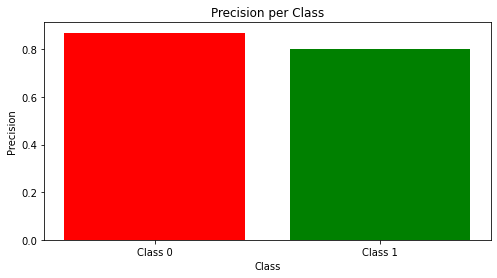

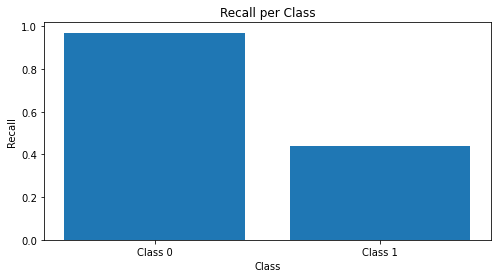

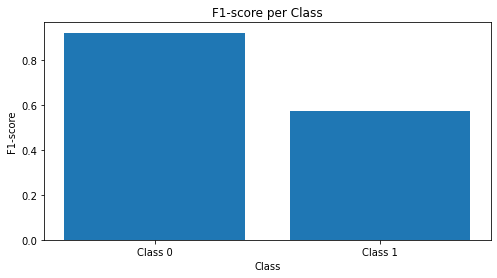

In [49]:
#visualize best model report 


import matplotlib.pyplot as plt

# Extract the metrics from the classification report
precision = [0.87, 0.80]
recall = [0.97, 0.44]
f1_score = [0.92, 0.57]
class_labels = ['Class 0', 'Class 1']

# Plot precision
plt.figure(figsize=(8, 4))
plt.bar(class_labels, precision,color=['red','green'])
plt.xlabel('Class')
plt.ylabel('Precision')
plt.title('Precision per Class')
plt.show()

# Plot recall
plt.figure(figsize=(8, 4))
plt.bar(class_labels, recall,color=['yellow','violet'])
plt.xlabel('Class')
plt.ylabel('Recall')
plt.title('Recall per Class')
plt.show()

# Plot F1-score
plt.figure(figsize=(8, 4))
plt.bar(class_labels, f1_score,color=['E75480','green'])
plt.xlabel('Class')
plt.ylabel('F1-score')
plt.title('F1-score per Class')
plt.show()
